In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# CHECKPOINT 1--> BUSINESS AND DATA UNDERSTANDING

In [45]:
companies=pd.read_csv("companies.txt",sep='\t',encoding='iso-8859-1')

In [46]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [47]:
# treating missing values
# there are broadly two ways to treat missing values
# delete- delete the missing values
# impute:
   # a- replace the missing values by another values, commenly the mean, median etc.
   # b- predective techniques-- knearest neighbour(discrete and categorical),linear regression(continuous)(iternativeimputer)
# otherwise,delection is often safer & recommended. you may lose some data, but will not make any unreasonable assumptions.

In [48]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [6]:
rounds2=pd.read_csv('rounds2.csv',encoding='iso-8859-1')
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [7]:
# drop unnecessary columns
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [8]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [9]:
cols1=['homepage_url','status','state_code','region','city','founded_at']
cols2=['funding_round_permalink','funding_round_code','funded_at']


companies.drop(cols1,axis=1,inplace=True)
rounds2.drop(cols2,axis=1,inplace=True)

In [10]:
companies.head()

,permalink,name,category_list,country_code
0,/Organization/-Fame,#fame,Media,IND
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/Organization/0-6-Com,0-6.com,Curated Web,CHN
4,/Organization/004-Technologies,004 Technologies,Software,USA


In [11]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/ORGANIZATION/-QOUNTER,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [12]:
companies['permalink']=companies['permalink'].str.lower()

In [13]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [14]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [15]:
companies.head()

,permalink,name,category_list,country_code
0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/organization/0-6-com,0-6.com,Curated Web,CHN
4,/organization/004-technologies,004 Technologies,Software,USA


In [16]:
# merge two dataframe
master_frame=pd.merge(companies,rounds2,left_on='permalink',right_on='company_permalink',how='inner')

In [17]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114942 non-null  object 
 1   name                114941 non-null  object 
 2   category_list       111535 non-null  object 
 3   country_code        106271 non-null  object 
 4   company_permalink   114942 non-null  object 
 5   funding_round_type  114942 non-null  object 
 6   raised_amount_usd   94958 non-null   float64
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


In [18]:
master_frame.head()

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,/organization/-fame,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2000000.0


In [19]:
master_frame.drop('company_permalink',axis=1,inplace=True)

In [20]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114942 non-null  object 
 1   name                114941 non-null  object 
 2   category_list       111535 non-null  object 
 3   country_code        106271 non-null  object 
 4   funding_round_type  114942 non-null  object 
 5   raised_amount_usd   94958 non-null   float64
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


In [21]:
master_frame.isnull().sum()

permalink                 0
name                      1
category_list          3407
country_code           8671
funding_round_type        0
raised_amount_usd     19984
dtype: int64

In [22]:
round((100*master_frame.isnull().sum())/len(master_frame),2)

permalink              0.00
name                   0.00
category_list          2.96
country_code           7.54
funding_round_type     0.00
raised_amount_usd     17.39
dtype: float64

In [23]:
# drop those rows which have empty cells equals to 4

master_frame[master_frame.isnull().sum(axis=1)>2]

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
201,/organization/2-ladoshki,2 Ladoshki,NaN,NaN,seed,NaN
275,/organization/24med-sp,24med Sp,NaN,NaN,private_equity,NaN
291,/organization/29west,29West,NaN,NaN,undisclosed,NaN
366,/organization/30secondstofly-claire,30SecondsToFly - Claire,NaN,NaN,undisclosed,NaN
439,/organization/3d-forms,3D Forms,NaN,NaN,undisclosed,NaN
...,...,...,...,...,...,...
114235,/organization/zilker-motors,Zilker Motors,NaN,NaN,non_equity_assistance,NaN
114253,/organization/zim-plant-technology-gmbh,ZIM Plant Technology GmbH,NaN,NaN,seed,NaN
114451,/organization/zlote-mysli,Zlote Mysli,NaN,NaN,venture,NaN
114799,/organization/zuoyebang,Zuoyebang,NaN,NaN,venture,NaN


In [24]:
master_frame2=master_frame[master_frame.isnull().sum(axis=1)<2]

In [25]:
master_frame2

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
...,...,...,...,...,...,...
114936,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,33149.0
114937,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,convertible_note,41313.0
114938,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,32842.0
114940,/organization/ãasys-2,Ãasys,Consumer Electronics|Internet of Things|Teleco...,USA,seed,18192.0


In [26]:
round((100*master_frame2.isnull().sum())/len(master_frame2),2)

permalink              0.00
name                   0.00
category_list          0.52
country_code           4.87
funding_round_type     0.00
raised_amount_usd     14.48
dtype: float64

In [27]:
master_frame2.dropna(inplace=True)

In [28]:
master_frame2.isnull().sum()

permalink             0
name                  0
category_list         0
country_code          0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [29]:
master_frame2.reset_index(drop=True,inplace=True)

In [30]:
master_frame2

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
3,/organization/01games-technology,01Games Technology,Games,HKG,undisclosed,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0
...,...,...,...,...,...,...
88523,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,7000.0
88524,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,33149.0
88525,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,convertible_note,41313.0
88526,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,32842.0


# CHECKPOINT 2 - FUNDING ANALYSIS

In [31]:
master_frame2['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [32]:
funding_lst=['seed','angel','venture','private_equity']
master_frame2=master_frame2[master_frame2['funding_round_type'].isin(funding_lst)]

In [33]:
master_frame2['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [34]:
master_frame2.reset_index(drop=True,inplace=True)

In [35]:
master_frame2

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
...,...,...,...,...,...,...
75118,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,CHN,venture,1587301.0
75119,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,7000.0
75120,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,33149.0
75121,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,32842.0


In [38]:
master_frame2.groupby('funding_round_type')['raised_amount_usd'].mean()
.sort_values(ascending=False).apply(lambda x: '{:.1f}'.format(x))

funding_round_type
private_equity    73938486.3
venture           11724222.7
angel               971573.9
seed                747827.9
Name: raised_amount_usd, dtype: object

### conclusion -- from the above analysis we can say that VENTURE investments is the best investment type for spark funds considering the constraint as they want to invest between 5 million to 15 million USD

In [39]:
# filtering the rows which contains venture investment type

master_frame3=master_frame2[master_frame2['funding_round_type']=='venture']

In [41]:
master_frame3.reset_index(drop=True,inplace=True)

In [43]:
master_frame3.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
3,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0


# CHECKPOINT 3 - COUNTRY ANALYSIS

In [50]:
country_lst=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language')

In [51]:
s1=country_lst[0]['ISO code']

In [52]:
s2=country_lst[1]['ISO code']

In [54]:
s3=pd.concat([s2,s1],axis=0,ignore_index=True)

In [55]:
len(s3)

58

In [56]:
s3

0     AUS
1     NZL
2     GBR
3     USA
4     ATG
5     BHS
6     BRB
7     BLZ
8     BWA
9     BDI
10    CMR
11    CAN
12    DMA
13    SWZ
14    FJI
15    GMB
16    GHA
17    GRD
18    GUY
19    IND
20    IRL
21    JAM
22    KEN
23    KIR
24    LSO
25    LBR
26    MWI
27    MLT
28    MHL
29    MUS
30    FSM
31    NAM
32    NRU
33    NGA
34    PAK
35    PLW
36    PNG
37    PHL
38    RWA
39    KNA
40    LCA
41    VCT
42    WSM
43    SYC
44    SLE
45    SGP
46    SLB
47    ZAF
48    SSD
49    SDN
50    TZA
51    TON
52    TTO
53    TUV
54    UGA
55    VUT
56    ZMB
57    ZWE
Name: ISO code, dtype: object

In [57]:
country_df=pd.DataFrame()
country_df['country_code']=s3

In [59]:
country_df.head()

,country_code
0,AUS
1,NZL
2,GBR
3,USA
4,ATG


In [61]:
master_frame4=pd.merge(master_frame3,country_df,on='country_code',how='inner')

In [62]:
master_frame4['country_code'].unique()

array(['IND', 'CAN', 'USA', 'GBR', 'IRL', 'SGP', 'AUS', 'NZL', 'PHL',
       'ZAF', 'KEN', 'CMR', 'NGA', 'PAK', 'MUS', 'TTO', 'KNA', 'MLT',
       'GHA', 'UGA', 'BWA'], dtype=object)

In [63]:
master_frame4

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,825000.0
...,...,...,...,...,...,...
40819,/organization/surfline-communications,Surfline Communications,Telecommunications,GHA,venture,15000000.0
40820,/organization/tigo,Tigo,Telecommunications,GHA,venture,15000000.0
40821,/organization/solarnow,SolarNOW,Solar,UGA,venture,2500000.0
40822,/organization/uafric,uAfrica,E-Commerce,BWA,venture,1500000.0


In [69]:
english_df=master_frame4.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

In [72]:
top_9=english_df.head(9)
top_9

,country_code,raised_amount_usd
0,USA,420068029342.0
1,GBR,20072813004.0
2,IND,14261508718.0
3,CAN,9482217668.0
4,SGP,2793917856.0
5,IRL,1669285543.0
6,AUS,1319028698.0
7,NZL,448316383.0
8,ZAF,233713106.0


### conclusion:- from the above table we can see that the top 3 countries are USA,GREAT BRITAIN and INDIA where they have received maximum amount of funding i.e Venture

# CHECKPOINT 4: SECTOR ANALYSIS

In [73]:
top_3=list(top_9['country_code'][:3])
top_3

['USA', 'GBR', 'IND']

In [74]:
master_frame5=master_frame4[master_frame4['country_code'].isin(top_3)]

In [75]:
master_frame5['country_code'].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

In [76]:
master_frame5.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,825000.0


In [77]:
master_frame5.shape

(38803, 6)

### apply business rule You discuss with the CEO and come up with the business rule that the first string before thevertical bar will be considered the primary sector. In the example above, ‘ApplicationPlatforms’ will be considered the primary sector.

In [78]:
master_frame5['category_list']=master_frame5['category_list'].apply(lambda x:x.split('|')[0])

In [79]:
master_frame5.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D,IND,venture,825000.0


In [82]:
mapping_df=pd.read_csv('mapping.csv')
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [87]:
master_frame5['category_list'].sort_values().unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Adaptive Equipment',
       'Advanced Materials', 'Adventure Travel', 'Advertising',
       'Advertising Exchanges', 'Advertising Networks',
       'Advertising Platforms', 'Advice', 'Aerospace', 'Agriculture',
       'Algorithms', 'All Markets', 'All Students',
       'Alternative Medicine', 'Alumni', 'Analytics', 'Android', 'Angels',
       'Animal Feed', 'Anything Capital Intensive', 'App Discovery',
       'App Marketing', 'App Stores',
       'Application Performance Monitoring', 'Application Platforms',
       'Apps', 'Architecture', 'Archiving', 'Art',
       'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'BPO Services', 'Babies', 'Baby Accessories',
       'Baby Boomers', 'Baby Safety', 'Banking', 'Batteries', 

In [88]:
mapping_df['category_list'].unique()

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'B

In [89]:
# string='pyth0n'
# string.replace('0','o')

'python'

In [90]:
mapping_df['category_list']=mapping_df['category_list'].str.replace('0','na')

In [91]:
mapping_df

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [97]:
# melts function

melt_df=pd.melt(mapping_df,id_vars='category_list',var_name='main_sector')


In [99]:
melt_df2=melt_df[melt_df['value']==1]

In [101]:
melt_df2.reset_index(drop=True,inplace=True)

In [103]:
melt_df2.drop('value',axis=1,inplace=True)

In [104]:
melt_df2

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports
...,...,...
683,Social Recruiting,"Social, Finance, Analytics, Advertising"
684,Social Television,"Social, Finance, Analytics, Advertising"
685,Social Travel,"Social, Finance, Analytics, Advertising"
686,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [106]:
master_frame6=pd.merge(master_frame5,melt_df2,on='category_list')

In [107]:
master_frame6.shape

(38638, 7)

In [108]:
master_frame6

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,Media,IND,venture,160000.0,Entertainment
2,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,Entertainment
3,/organization/audiosocket,Audiosocket,Media,USA,venture,650000.0,Entertainment
4,/organization/audiosocket,Audiosocket,Media,USA,venture,750000.0,Entertainment
...,...,...,...,...,...,...,...
38633,/organization/smarkets,Smarkets,Financial Exchanges,GBR,venture,2300000.0,"Social, Finance, Analytics, Advertising"
38634,/organization/stingray-geophysical,Stingray Geophysical,Gas,GBR,venture,1300000.0,Cleantech / Semiconductors
38635,/organization/stingray-geophysical,Stingray Geophysical,Gas,GBR,venture,4570000.0,Cleantech / Semiconductors
38636,/organization/stingray-geophysical,Stingray Geophysical,Gas,GBR,venture,11460000.0,Cleantech / Semiconductors


# CHECKPOINT 5: SECTOR ANALYSIS 2

In [109]:
D1=master_frame6[master_frame6['country_code']==top_3[0]]
D2=master_frame6[master_frame6['country_code']==top_3[1]]
D3=master_frame6[master_frame6['country_code']==top_3[2]]

In [110]:
D1.reset_index(drop=True,inplace=True)
D2.reset_index(drop=True,inplace=True)
D3.reset_index(drop=True,inplace=True)

In [111]:
D1.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,Entertainment
1,/organization/audiosocket,Audiosocket,Media,USA,venture,650000.0,Entertainment
2,/organization/audiosocket,Audiosocket,Media,USA,venture,750000.0,Entertainment
3,/organization/audiosocket,Audiosocket,Media,USA,venture,1582300.0,Entertainment
4,/organization/babble,Babble,Media,USA,venture,2000000.0,Entertainment


In [112]:
D2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/90min,90min,Media,GBR,venture,15000000.0,Entertainment
1,/organization/90min,90min,Media,GBR,venture,5800000.0,Entertainment
2,/organization/90min,90min,Media,GBR,venture,18000000.0,Entertainment
3,/organization/teepix,Teepix,Media,GBR,venture,1655405.0,Entertainment
4,/organization/31dover,31Dover,E-Commerce,GBR,venture,2274716.0,Others


In [113]:
D3.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,Media,IND,venture,160000.0,Entertainment
2,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0,Others
3,/organization/agrostar,Agrostar,E-Commerce,IND,venture,4000000.0,Others
4,/organization/au-financiers,Au FINANCIERS,E-Commerce,IND,venture,21000000.0,Others


In [114]:
#USA
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,8310
1,Cleantech / Semiconductors,7857
2,"Social, Finance, Analytics, Advertising",7246
3,"News, Search and Messaging",4350
4,Health,3269
5,Manufacturing,2453
6,Entertainment,1794
7,Automotive & Sports,505


In [115]:
#GBR
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,516
1,Cleantech / Semiconductors,437
2,"Social, Finance, Analytics, Advertising",421
3,"News, Search and Messaging",241
4,Entertainment,136
5,Manufacturing,122
6,Health,118
7,Automotive & Sports,44


In [116]:
#ind
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,284
1,"Social, Finance, Analytics, Advertising",147
2,"News, Search and Messaging",130
3,Entertainment,76
4,Manufacturing,55
5,Cleantech / Semiconductors,54
6,Health,42
7,Automotive & Sports,31


# The total amount invested in each main sector in a separate column


In [119]:
# USA
D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,118834869645.0
1,"Social, Finance, Analytics, Advertising",86331402349.0
2,Others,82796823598.0
3,"News, Search and Messaging",45439636584.0
4,Health,31675057766.0
5,Manufacturing,24845319470.0
6,Entertainment,17014560960.0
7,Automotive & Sports,11632164696.0


In [120]:
# GBR
D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,5052849729.0
1,Others,4492219646.0
2,"Social, Finance, Analytics, Advertising",3773328672.0
3,"News, Search and Messaging",2956023749.0
4,Entertainment,1162564878.0
5,Health,1046654806.0
6,Manufacturing,1019283214.0
7,Automotive & Sports,480878712.0


In [121]:
# IND
D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,6329507440.0
1,"News, Search and Messaging",1739579948.0
2,"Social, Finance, Analytics, Advertising",1578804920.0
3,Automotive & Sports,1556350000.0
4,Entertainment,976191777.0
5,Cleantech / Semiconductors,786444633.0
6,Manufacturing,730260000.0
7,Health,564370000.0


# CHECKPOINT 6 : PLOTS

# 1

In [158]:
funding_lst3=['seed','venture','private_equity']
master_frame8=master_frame2[master_frame2['funding_round_type'].isin(funding_lst3)]

In [159]:
master_frame8['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity'], dtype=object)

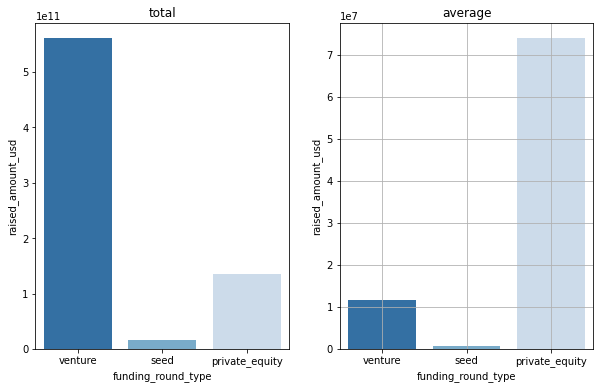

In [168]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('total')
sb.barplot(data=master_frame8,x='funding_round_type',y='raised_amount_usd',estimator=np.sum,ci=False,palette='Blues_r')

plt.subplot(122)
plt.title('average')
sb.barplot(data=master_frame8,x='funding_round_type',y='raised_amount_usd',estimator=np.mean,ci=False,palette='Blues_r')
plt.grid()
plt.show()

# 2

In [175]:
ac=master_frame4.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index().head(9)

In [176]:
a

,country_code,raised_amount_usd
0,USA,420068029342.0
1,GBR,20072813004.0
2,IND,14261508718.0
3,CAN,9482217668.0
4,SGP,2793917856.0
5,IRL,1669285543.0
6,AUS,1319028698.0
7,NZL,448316383.0
8,ZAF,233713106.0


In [180]:
a['raised_amount_usd']=a['raised_amount_usd'].astype(float)

In [185]:
a

,country_code,raised_amount_usd
0,USA,4.200680e+11
1,GBR,2.007281e+10
2,IND,1.426151e+10
3,CAN,9.482218e+09
4,SGP,2.793918e+09
5,IRL,1.669286e+09
6,AUS,1.319029e+09
7,NZL,4.483164e+08
8,ZAF,2.337131e+08


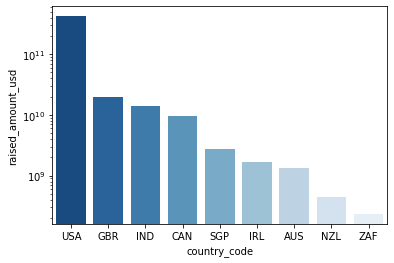

In [186]:
plt.yscale('log')
sb.barplot(data=a,x='country_code',y='raised_amount_usd',palette='Blues_r')
plt.show()

# 3

In [187]:
x=D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index().head(3)
y=D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index().head(3)
z=D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index().head(3)

In [189]:
x['raised_amount_usd']=x['raised_amount_usd'].astype(float)
y['raised_amount_usd']=y['raised_amount_usd'].astype(float)
z['raised_amount_usd']=z['raised_amount_usd'].astype(float)

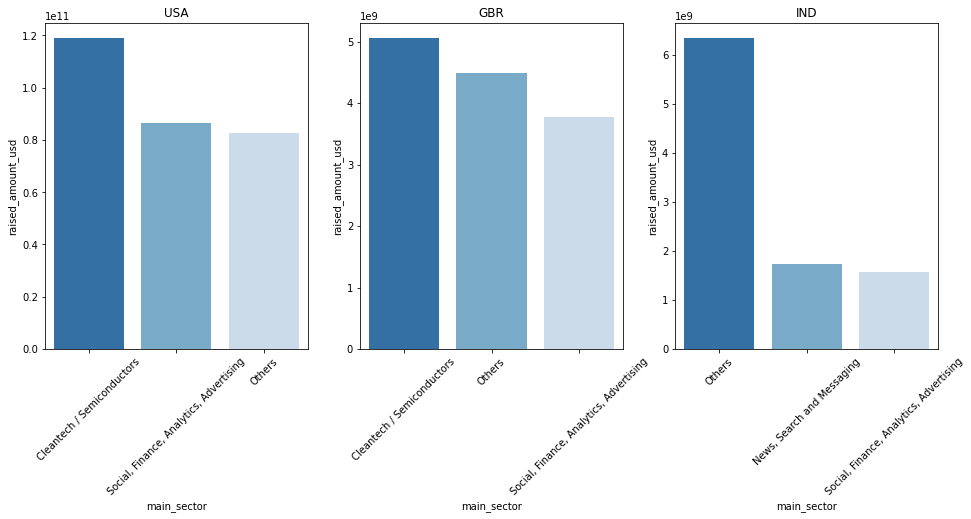

In [191]:
plt.figure(figsize=(16,6))
plt.subplot(131)
plt.title('USA')
plt.xticks(rotation=45)
sb.barplot(data=x,x='main_sector',y='raised_amount_usd',palette='Blues_r')

plt.subplot(132)
plt.title('GBR')
plt.xticks(rotation=45)
sb.barplot(data=y,x='main_sector',y='raised_amount_usd',palette='Blues_r')

plt.subplot(133)
plt.title('IND')
plt.xticks(rotation=45)
sb.barplot(data=z,x='main_sector',y='raised_amount_usd',palette='Blues_r')
plt.show()